<a href="https://colab.research.google.com/github/akilaIduwara/CalculatorApplications_with-ErrorHandling-Java-C-/blob/main/finally_did_it_01_FIXED_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTEBOOK 01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset (update the path if needed)
df = pd.read_csv("/content/5DATA002W.2 Coursework Dataset(25012025v6.0).csv")

# Initial exploration
print(df.head())
print(df.info())
print(df.describe(include='all'))

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Encode categorical columns
categorical_cols = ['Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage',
                    'Differentiated', 'Grade', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Drop unnecessary columns
df = df.drop(['Patient_ID', 'Month_of_Birth'], axis=1)

# Clean Mortality_Status labels
df['Mortality_Status'] = df['Mortality_Status'].astype(str).str.strip().str.upper()
print("Unique labels before mapping:", df['Mortality_Status'].unique())
df = df[df['Mortality_Status'].isin(['ALIVE', 'DEAD'])]
df['Mortality_Status'] = df['Mortality_Status'].map({'ALIVE': 0, 'DEAD': 1})

print("Remaining samples after cleaning:", df.shape[0])
print("Class distribution:\n", df['Mortality_Status'].value_counts())

# Separate classification and regression datasets
df_classification = df.drop('Survival_Months', axis=1)
df_regression = df[df['Mortality_Status'] == 1].drop('Mortality_Status', axis=1)

# Save to local Colab environment
df_classification.to_csv('classification_dataset.csv', index=False)
df_regression.to_csv('regression_dataset.csv', index=False)

print("Files saved locally in the Colab environment.")


  Patient_ID  Month_of_Birth   Age     Sex   Occupation T_Stage N_Stage  \
0      A0012              12  68.0  Female     Teaching      T1      N1   
1      A0013              12  50.0  Female      Medical      T2      N2   
2      A0014              11  58.0  Female  Engineering      T3      N3   
3      A0015               3  58.0  Female   Technology      T1      N1   
4      A0016               1  47.0  Female   Multimedia      T2      N1   

  6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
0       IIA      Poorly differentiated      3  Regional         4.0   
1      IIIA  Moderately differentiated      2  Regional        35.0   
2      IIIC  Moderately differentiated      2  Regional        63.0   
3       IIA      Poorly differentiated      3  Regional        18.0   
4       IIB      Poorly differentiated      3  Regional        41.0   

  Estrogen_Status Progesterone_Status  Regional_Node_Examined  \
0        Positive            Positive                    

NOTEBOOK 02


In [2]:

# Author: Student Name
# Peer Reviewer: Classmate Name

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt


In [3]:
X = df.drop('Mortality_Status', axis=1)
y = df['Mortality_Status'].map({'Alive': 0, 'Dead': 1})

# Drop rows with missing target labels
non_null_idx = y.notnull()
X = X[non_null_idx]
y = y[non_null_idx]


In [6]:
X = df.drop('Mortality_Status', axis=1)
y = df['Mortality_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (4024, 15)
y shape: (4024,)


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Get the Code Output
print("Training label ratio:\n", y_train.value_counts(normalize=True))
print("\nTest label ratio:\n", y_test.value_counts(normalize=True))


Training label ratio:
 Mortality_Status
0    0.846946
1    0.153054
Name: proportion, dtype: float64

Test label ratio:
 Mortality_Status
0    0.846854
1    0.153146
Name: proportion, dtype: float64


In [12]:
from sklearn.impute import SimpleImputer

# Impute missing values before scaling
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split on imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Naive Bayes (use unscaled if needed)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)



Logistic Regression
[[997  26]
 [100  85]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1023
           1       0.77      0.46      0.57       185

    accuracy                           0.90      1208
   macro avg       0.84      0.72      0.76      1208
weighted avg       0.89      0.90      0.88      1208

AUC-ROC: 0.8675385062481838


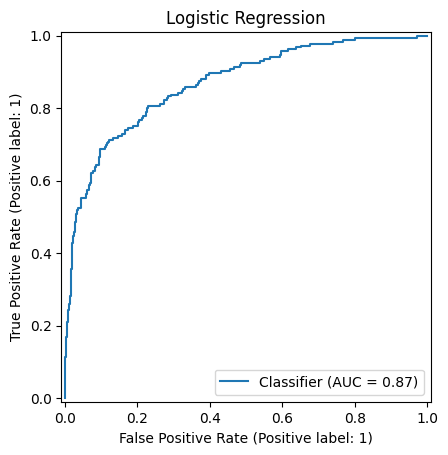


Naive Bayes
[[878 145]
 [ 99  86]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1023
           1       0.37      0.46      0.41       185

    accuracy                           0.80      1208
   macro avg       0.64      0.66      0.65      1208
weighted avg       0.82      0.80      0.81      1208

AUC-ROC: 0.7882222398351431


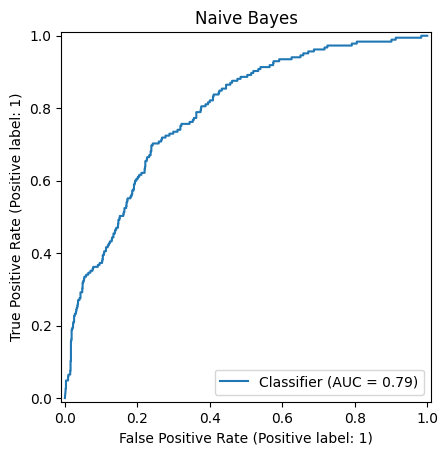


KNN
[[989  34]
 [122  63]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1023
           1       0.65      0.34      0.45       185

    accuracy                           0.87      1208
   macro avg       0.77      0.65      0.69      1208
weighted avg       0.85      0.87      0.85      1208

AUC-ROC: 0.7574912155557317


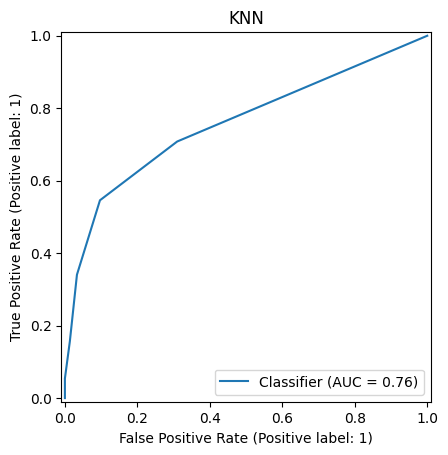

In [14]:

# Evaluation function
def evaluate_model(name, y_test, y_pred, model, X_test_scaled):
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        print("AUC-ROC:", auc)
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(name)
        plt.show()

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_pred_lr, lr, X_test_scaled)
evaluate_model("Naive Bayes", y_test, y_pred_nb, nb, X_test)
evaluate_model("KNN", y_test, y_pred_knn, knn, X_test_scaled)



Tuned Logistic Regression
[[997  26]
 [100  85]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1023
           1       0.77      0.46      0.57       185

    accuracy                           0.90      1208
   macro avg       0.84      0.72      0.76      1208
weighted avg       0.89      0.90      0.88      1208

AUC-ROC: 0.8672954479406092


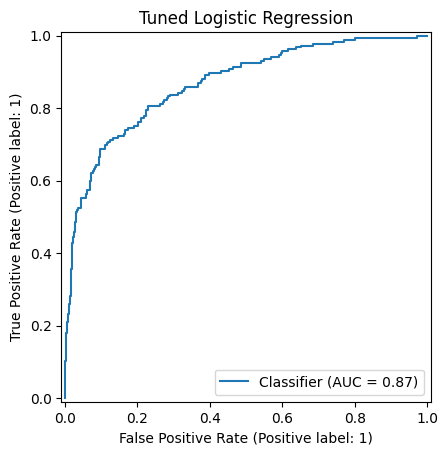

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [15]:

# GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)
best_lr = grid.best_estimator_
y_best_lr_pred = best_lr.predict(X_test_scaled)

# Evaluate tuned model
evaluate_model("Tuned Logistic Regression", y_test, y_best_lr_pred, best_lr, X_test_scaled)
print("Best Hyperparameters:", grid.best_params_)


In [16]:
# Run this FIRST to define X and y
classification_df = pd.read_csv('/content/classification_dataset.csv')
X = classification_df.drop('Mortality_Status', axis=1)
y = classification_df['Mortality_Status'].map({'Alive': 0, 'Dead': 1})

In [17]:
#all feature names used for building your classification models and the corresponding data
print("Features used:", list(X.columns))  # Shows feature names
print("X shape:", X.shape)               # Shows (samples, features)
print("y shape:", y.shape)               # Shows (samples,)

Features used: ['Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
X shape: (4024, 14)
y shape: (4024,)


Rebuild and Fit Your Logistic Regression with GridSearchCV

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Step 2: Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Step 3: Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Step 4: Best estimator
best_lr_model = grid_search.best_estimator_

# Step 5: Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
# Step 6: Make predictions
y_pred_best = best_lr_model.predict(X_test_scaled)

# Step 7: Evaluate
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix (After Tuning):")
print(confusion_matrix(y_test, y_pred_best))

print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_best))

# Step 8: AUC-ROC
if hasattr(best_lr_model, "predict_proba"):
    y_proba_best = best_lr_model.predict_proba(X_test_scaled)[:, 1]
    auc_best = roc_auc_score(y_test, y_proba_best)
    print("AUC-ROC (After Tuning):", auc_best)


Confusion Matrix (After Tuning):
[[997  26]
 [100  85]]
Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1023
           1       0.77      0.46      0.57       185

    accuracy                           0.90      1208
   macro avg       0.84      0.72      0.76      1208
weighted avg       0.89      0.90      0.88      1208

AUC-ROC (After Tuning): 0.8672637446830995


NOTEBOOK 03


In [20]:

# Author: Student Name
# Peer Reviewer: Classmate Name

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Load data
df = pd.read_csv('/content/regression_dataset.csv')



# Separate features and target
X_reg = df.drop(columns='Survival_Months')
y_reg = df['Survival_Months']

# Identify categorical and numerical features
categorical_cols = X_reg.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_reg.select_dtypes(exclude=['object']).columns.tolist()

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define the full pipeline
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_encoded = full_pipeline.fit_transform(X_reg)


In [22]:
# Split encoded features and original target
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_reg, test_size=0.3, random_state=42)

# Decision Tree 1 - Fully grown
dt1 = DecisionTreeRegressor(random_state=42)
dt1.fit(X_train_enc, y_train_enc)
y_pred_dt1 = dt1.predict(X_test_enc)

# Decision Tree 2 - Pruned (max depth = 4)
dt2 = DecisionTreeRegressor(max_depth=4, random_state=42)
dt2.fit(X_train_enc, y_train_enc)
y_pred_dt2 = dt2.predict(X_test_enc)


In [24]:
print(X_reg.columns.tolist())


['Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']


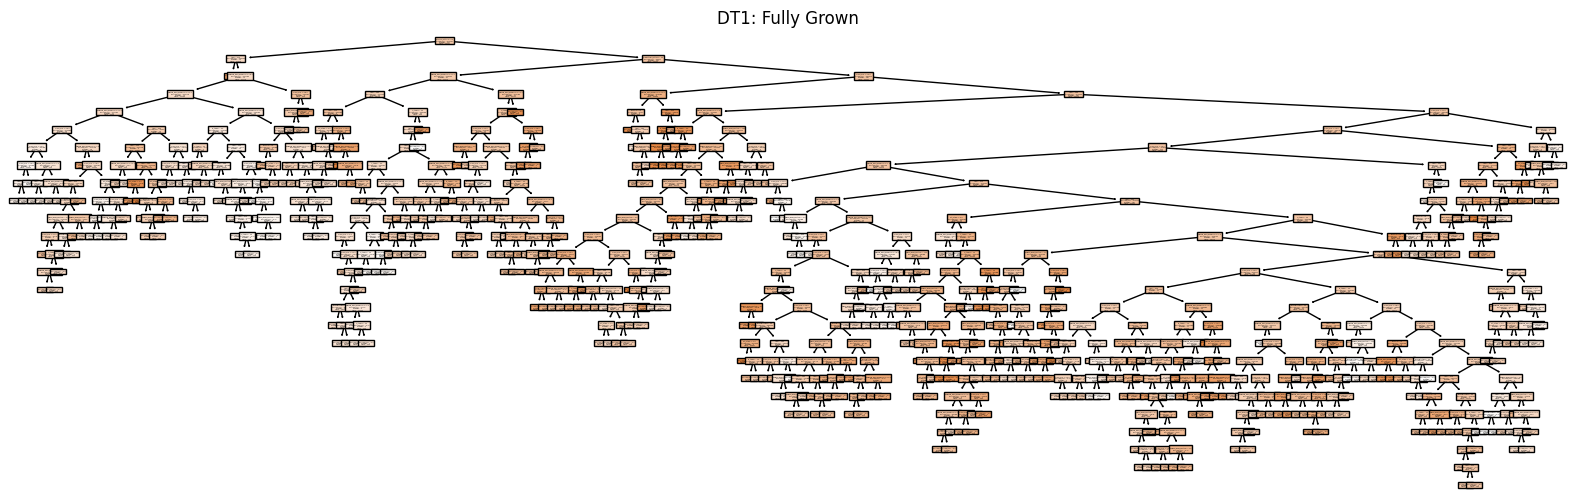

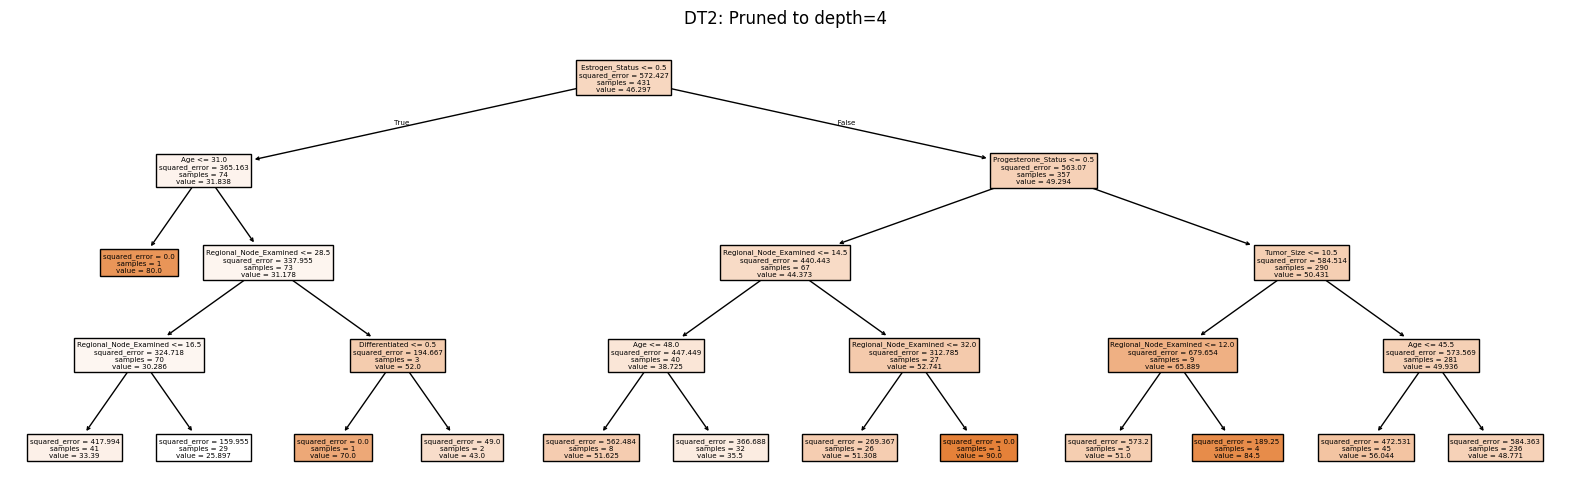

In [25]:

# Visualise trees
plt.figure(figsize=(20, 6))
plot_tree(dt1, filled=True, feature_names=X_reg.columns)
plt.title("DT1: Fully Grown")
plt.show()

plt.figure(figsize=(20, 6))
plot_tree(dt2, filled=True, feature_names=X_reg.columns)
plt.title("DT2: Pruned to depth=4")
plt.show()


In [26]:
df_cls = pd.read_csv("/content/classification_dataset.csv")
y_cls = df_cls['Mortality_Status'].map({'Alive': 0, 'Dead': 1})

# Drop rows where target is missing
non_null_mask = y_cls.notnull()
X_cls = df_cls.drop('Mortality_Status', axis=1)
X_cls = X_cls[non_null_mask]
y_cls = y_cls[non_null_mask]


In [27]:
# Drop rows with missing values if any (optional but common fix)
df_cls = df_cls.dropna()

# Define features and target
X_cls = df_cls.drop(columns=['Mortality_Status'])  # change if your target column has a different name
y_cls = df_cls['Mortality_Status']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.3, stratify=y_cls, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)


Voting Classifier Confusion Matrix:
[[989  30]
 [156  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1019
           1       0.49      0.16      0.24       185

    accuracy                           0.85      1204
   macro avg       0.68      0.56      0.58      1204
weighted avg       0.81      0.85      0.81      1204

AUC-ROC Score: 0.7162613054664085


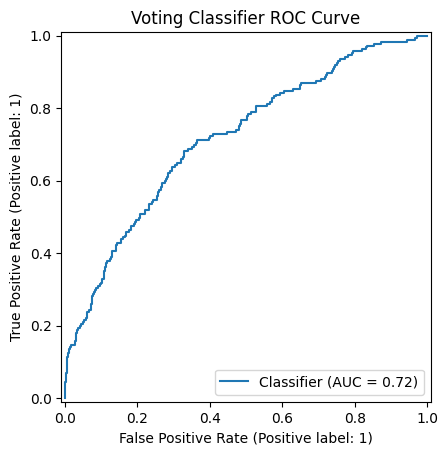

In [29]:

# Build Voting Classifier with LR and KNN
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)
voting = VotingClassifier(estimators=[('lr', logreg), ('knn', knn)], voting='soft')
voting.fit(X_train_cls_scaled, y_train_cls)
y_pred_vote = voting.predict(X_test_cls_scaled)

# Evaluate ensemble
print("Voting Classifier Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_vote))
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_vote))
y_proba_vote = voting.predict_proba(X_test_cls_scaled)[:, 1]
print("AUC-ROC Score:", roc_auc_score(y_test_cls, y_proba_vote))
RocCurveDisplay.from_predictions(y_test_cls, y_proba_vote)
plt.title("Voting Classifier ROC Curve")
plt.show()


✅ Step-by-Step Final Python Notebook 3 Code (for Task 5.f)

In [30]:
# Step 1: Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define and train base learners
lr = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

lr.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# Step 3: Create and train voting ensemble classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr),
    ('knn', knn)
], voting='soft')

voting_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1023
           1       0.77      0.46      0.57       185

    accuracy                           0.90      1208
   macro avg       0.84      0.72      0.76      1208
weighted avg       0.89      0.90      0.88      1208

Logistic Regression - Confusion Matrix:
[[997  26]
 [100  85]]
Logistic Regression - AUC-ROC: 0.8679

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1023
           1       0.65      0.34      0.45       185

    accuracy                           0.87      1208
   macro avg       0.77      0.65      0.69      1208
weighted avg       0.85      0.87      0.85      1208

KNN - Confusion Matrix:
[[989  34]
 [122  63]]
KNN - AUC-ROC: 0.7575

Voting Ensemble - Classification Report:
              precision    recall  f1-score   support

   

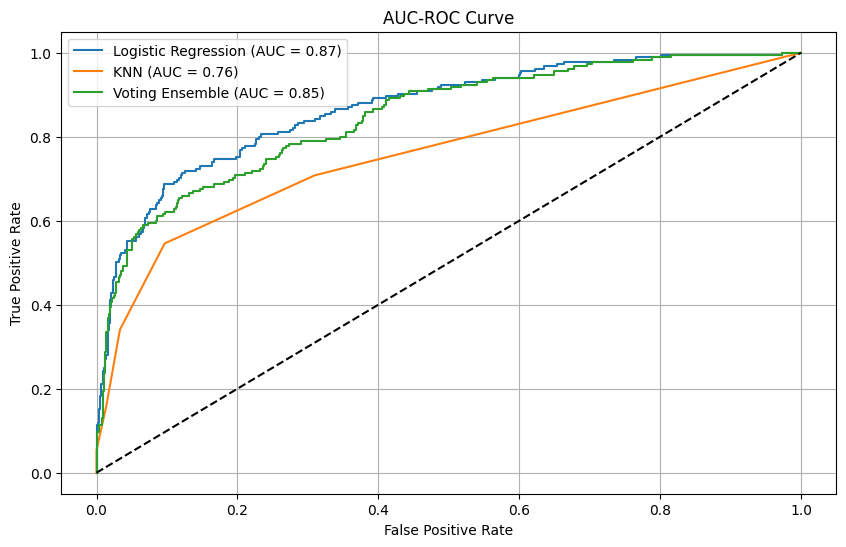

In [31]:
# Evaluation Code for All Models

# Helper function to evaluate and visualize
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"{name} - Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    auc = roc_auc_score(y_test, y_prob)
    print(f"{name} - AUC-ROC: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Step 4: Evaluate all models
plt.figure(figsize=(10, 6))
evaluate_model("Logistic Regression", lr, X_test_scaled, y_test)
evaluate_model("KNN", knn, X_test_scaled, y_test)
evaluate_model("Voting Ensemble", voting_clf, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Features and target
X = df.drop('Survival_Months', axis=1)
y = df['Survival_Months']

# Convert categorical features
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train models
dt1 = DecisionTreeRegressor(random_state=42)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeRegressor(max_depth=4, random_state=42)
dt2.fit(X_train, y_train)

# Predict
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

# Evaluate
print("DT-1 MSE:", mean_squared_error(y_test, y_pred_dt1))
print("DT-1 MAE:", mean_absolute_error(y_test, y_pred_dt1))
print("DT-1 R2:", r2_score(y_test, y_pred_dt1))

print("DT-2 MSE:", mean_squared_error(y_test, y_pred_dt2))
print("DT-2 MAE:", mean_absolute_error(y_test, y_pred_dt2))
print("DT-2 R2:", r2_score(y_test, y_pred_dt2))


DT-1 MSE: 1187.233870967742
DT-1 MAE: 27.669354838709676
DT-1 R2: -1.1614614513158994
DT-2 MSE: 581.2703491311291
DT-2 MAE: 18.571086018423873
DT-2 R2: -0.05825270249049952


NameError: name 'model_DT2' is not defined